# Holonization project


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%run models.py

ModuleNotFoundError: No module named '__main__.models'; '__main__' is not a package

## Populate with data

In [45]:
n = 0
M = []  # Interaction matrices
stake_holders = ['v', 'd', 'f', 'ext', 'int']

Now let's populate them.

In [3]:
data_0 = [
    [0, 7.5, 10, 0.3, 4],
    [0, 0, 0, 0.1, 8],
    [9.5, 0, 0, 0.3, 0],
    [10, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.01]
]
M.append(pd.DataFrame(data=data_0, columns=stake_holders, index=stake_holders))

In [4]:
data_1 = [
    [0, 8.5, 20, 0.4, 4],
    [0, 0, 0, 0.4, 8],
    [19, 0, 0, 0.3, 0],
    [20, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.01]
]
M.append(pd.DataFrame(data=data_1, columns=stake_holders, index=stake_holders))

In [5]:
data_pes = [1, 2, 0, 0, 0]
PES = [
    pd.Series(data=[0, 0, 0, 0, 0], index=stake_holders), 
    pd.Series(data=data_pes, index=stake_holders)
]

### Methods


In [6]:
def s(df, stake_holder):
    return df.loc[stake_holder, :].sum()
def e(df, stake_holder):
    return df.loc[:, stake_holder].sum()
def mod(df, stake_holder):
    return np.sqrt(
        np.power(e(df, stake_holder), 2) + 
        np.power(s(df, stake_holder), 2)
    )
def slope(df, stake_holder):
    return s(df, stake_holder)/e(df, stake_holder)

## Data viz

In [7]:
def plot_interaction(df, n, m):
    ids = df[n].index
    x_n = [ e(df[n], sh) for sh in ids]
    x_m = [ e(df[m], sh) for sh in ids]
    y_n = [ s(df[n], sh) for sh in ids]
    y_m = [ s(df[m], sh) for sh in ids]
    
    dx = [a - b for a, b in zip(x_m, x_n)]
    dy = [a - b for a, b in zip(y_m, y_n)]
    
    # arrows
    for x_0, y_0, dx_0, dy_0, id_ in zip(x_n, y_n, dx, dy, ids):
        if dx_0 !=0 and dy_0 != 0:
            print(f'{id_}: ({x_0}, {y_0}) => ({x_0+dx_0}, {y_0+dy_0})')
            plt.arrow(x_0, y_0, dx_0, dy_0, head_width=0.5, length_includes_head=True, label=id_)
    
    # points
    plt.scatter(x_n, y_n, c='blue', marker="o")
    plt.scatter(x_m, y_m, c='green')
    for x_0, y_0, id_ in zip(x_n, y_n, ids):
        plt.annotate(id_, (x_0, y_0), xytext=(x_0-1, y_0))
        
    # first bissectrice
    top  = max(x_n + x_m + y_n + y_m)
    plt.plot([0, top], [0, top], color='orange', linestyle='dashed', linewidth=2, markersize=12)
    
    # infos
    plt.title('Holons rentability progress')
    plt.axes().set_xlabel('Income')
    plt.axes().set_ylabel('Outcome')


v: (19.5, 21.8) => (39.0, 32.9)
d: (7.5, 8.1) => (8.5, 8.4)
f: (10, 9.8) => (20, 19.3)
ext: (0.7, 10.0) => (1.1, 20.0)


/home/eydwales/.local/share/virtualenvs/holonization-19PnVPEF/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


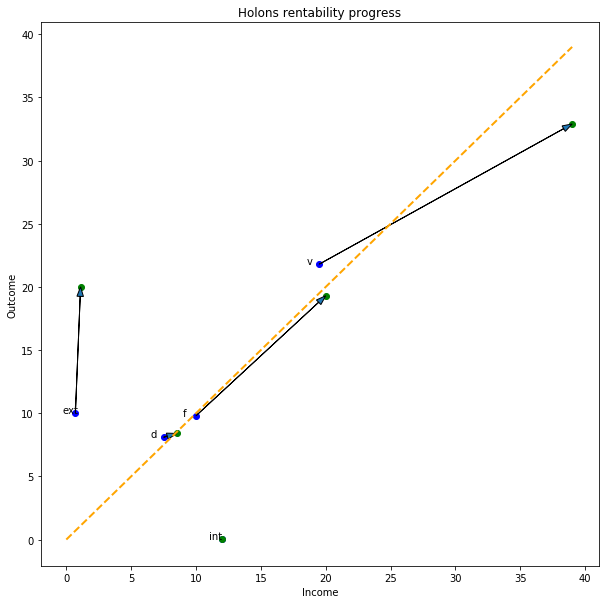

In [8]:
plt.figure(figsize=(10,10))
plot_interaction(M, n, n+1)
plt.show()

## First ration function

In [9]:
def r_one(df, n, stake_holder):
    return mod(df[n+1], stake_holder)/mod(df[n], stake_holder) * slope(df[n], stake_holder)/slope(df[n+1], stake_holder)
def r(df, n):
    data = [r_one(df, n, index) for index in df[n].index]
    return pd.Series(data=data, index=df[n].index)

In [10]:
r(M, 0)

v      2.311822
d      1.183075
f      2.015918
ext    1.569962
int    1.000000
dtype: float64

## Second ratio function resolution

In [ ]:
def get_state(situation, holon):
    """ Get the income and outcome of a holon in a situation."""
    
    return income, outcome

In [ ]:
def compute_g(situation, deposit, n):
    """Get the revised ration g from a situation with a deposit at a specific time (n)."""
    
    return computed_g

In [ ]:
def g()

In [39]:
def g_one(df, depo, n, sh):
    s_n1 = s(df[n+1], sh)
    d = depo[n+1][sh]
    mod_n1_2 = mod(df[n], sh) ** 2
    assert mod_n1_2 != 0
    
    left_coef = mod_n1_2
    left_fact_1 = np.poly1d([d/s_n1, 1-d/s_n1])**2
    left_fact_2 = np.poly1d([1, 0, 0])
    left = np.polymul(left_fact_1, left_fact_2) * left_coef
    
    right_coef = r_one(df, n, sh) ** 2
    right_fact  = np.poly1d([
        d**2,
        2*s_n1*d-2*d**2,
        mod_n1_2 - 2*s_n1*d +d**2
    ])
    right = right_fact * right_coef
      
    func = left - right

    roots = np.roots(func)
    real_roots = np.real(roots[~np.iscomplex(roots)])
    print('Real roots for '+sh)
    print(real_roots)
    positive_real_roots = real_roots[real_roots > 0 ]
#     offset = abs(max(positive_real_roots) - min(positive_real_roots)) / 5
#     x = np.linspace(min(positive_real_roots) - offset, max(positive_real_roots) + offset, 1000)
#     plt.plot(x, np.polyval(func, x))
#     plt.plot([x[0], x[-1]], [0,0])
#     plt.plot(positive_real_roots, np.full(len(positive_real_roots), 0), 'bo')
    return min(positive_real_roots)
    

In [40]:
def g(df, depo,  n):
    data = [g_one(df, depo, n, index) for index in df[n].index]
    return pd.Series(data=data, index=df[n].index)

In [41]:
g_one(M, PES, 0, 'v')

Real roots for v
[ 2.33515305 -2.24006172]


2.335153048004985

In [42]:
g(M, PES, n)

Real roots for v
[ 2.33515305 -2.24006172]
Real roots for d
[-4.02236871  1.16451007]
Real roots for f
[-2.01591793  2.01591793]
Real roots for ext
[-1.56996186  1.56996186]
Real roots for int
[-1.  1.]


v      2.335153
d      1.164510
f      2.015918
ext    1.569962
int    1.000000
dtype: float64

## Let's compare R and G

In [43]:
r(M, 0) 

v      2.311822
d      1.183075
f      2.015918
ext    1.569962
int    1.000000
dtype: float64

In [44]:
g(M, PES, n)

Real roots for v
[ 2.33515305 -2.24006172]
Real roots for d
[-4.02236871  1.16451007]
Real roots for f
[-2.01591793  2.01591793]
Real roots for ext
[-1.56996186  1.56996186]
Real roots for int
[-1.  1.]


v      2.335153
d      1.164510
f      2.015918
ext    1.569962
int    1.000000
dtype: float64

In [17]:
def plot_pes_expense_r(df, PES, n):
    r_pes_expenses = (r(df, n) - 1) * PES[n+1]

    ids = df[n].index
    x_n1 = [ e(df[n+1], sh) for sh in ids]
    y_n1 = [ s(df[n+1], sh) for sh in ids]
    x_n1_with_pes = x_n1
    y_n1_with_pes = y_n1 + r_pes_expenses
    print('------r')
    for x_0, y_0, x_1, y_1, id_ in zip(x_n1, y_n1, x_n1_with_pes, y_n1_with_pes, ids):
        if y_0 != y_1:
            print(f'{id_}: pes valo => (+0, {y_0-y_1})')
            plt.plot([x_0, x_1], [y_0, y_1], color='yellow', linestyle='--', linewidth=1, marker="X")

In [18]:
def plot_pes_expense_g(df, PES, n):
    g_pes_expenses = (g(df, PES, n)-1) * PES[n+1]

    ids = df[n].index
    x_n1 = [ e(df[n+1], sh) for sh in ids]
    y_n1 = [ s(df[n+1], sh) for sh in ids]
    x_n1_with_pes = x_n1
    y_n1_with_pes = y_n1 + g_pes_expenses
    print('------g')
    for x_0, y_0, x_1, y_1, id_ in zip(x_n1, y_n1, x_n1_with_pes, y_n1_with_pes, ids):
        if y_0 != y_1:
            print(f'{id_}: pes valo => (+0, {y_0-y_1})')
            plt.plot([x_0, x_1], [y_0, y_1], color='grey', linestyle='--', linewidth=2, marker="*")

v: (19.5, 21.8) => (39.0, 32.9)
d: (7.5, 8.1) => (8.5, 8.4)
f: (10, 9.8) => (20, 19.3)
ext: (0.7, 10.0) => (1.1, 20.0)
------g
v: pes valo => (+0, -1.3351530480049831)
d: pes valo => (+0, -0.32902013828812393)
------r
v: pes valo => (+0, -1.3118220782275785)
d: pes valo => (+0, -0.36614913157196227)


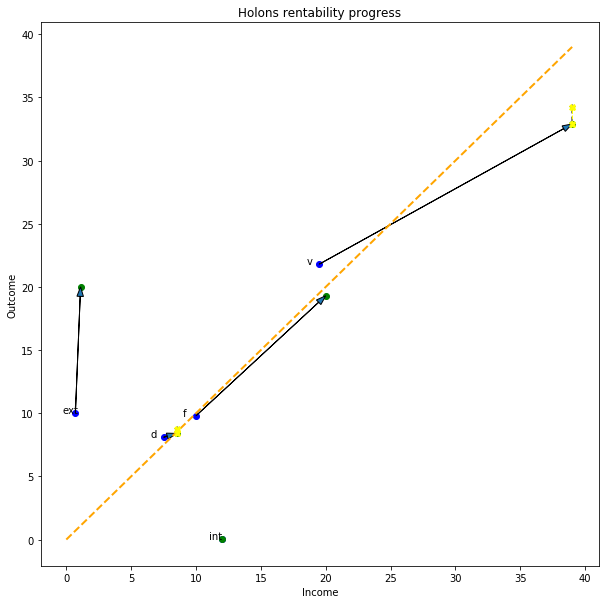

In [22]:
plt.figure(figsize=(10,10))
plot_interaction(M, n, n+1)
plot_pes_expense_g(M, PES, n)
plot_pes_expense_r(M, PES, n)
plt.show()

(4,)